In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv('Terry Stops_data.csv')

In [4]:
df.head()

,Arrested,Weapon,OfficerAge,OfficerMale,SubjectMale,Frisked,OfficerBlack,OfficerWhite,OfficerHispanic,OfficerAsian,...,OfficerPacIslander,OfficerUnknown,SubjectBlack,SubjectWhite,SubjectHispanic,SubjectAsian,SubjectNative,SubjectMultiracial,SubjectPacIslander,SubjectUnknown
0,1,0,31,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,52,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,30,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,36,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,36,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_features = df[['Weapon','OfficerAge','OfficerMale','SubjectMale','OfficerBlack','OfficerWhite','OfficerHispanic',
                  'OfficerAsian','OfficerNative','OfficerMultiracial','OfficerPacIslander','OfficerUnknown','SubjectBlack',
                  'SubjectWhite','SubjectHispanic','SubjectAsian','SubjectNative','SubjectMultiracial','SubjectPacIslander',
                  'SubjectUnknown']].copy()


In [6]:
df_features.head()

,Weapon,OfficerAge,OfficerMale,SubjectMale,OfficerBlack,OfficerWhite,OfficerHispanic,OfficerAsian,OfficerNative,OfficerMultiracial,OfficerPacIslander,OfficerUnknown,SubjectBlack,SubjectWhite,SubjectHispanic,SubjectAsian,SubjectNative,SubjectMultiracial,SubjectPacIslander,SubjectUnknown
0,0,31,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,52,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,36,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,36,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
X = df_features
y = df['Frisked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [8]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [10]:
pred = knn.predict(X_test)

In [11]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[7416  463]
 [1815  404]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      7879
           1       0.47      0.18      0.26      2219

   micro avg       0.77      0.77      0.77     10098
   macro avg       0.63      0.56      0.56     10098
weighted avg       0.73      0.77      0.73     10098



In [12]:
#Elbow Method: Iterate multiple possibilities to figure out which K value has the lowest error
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

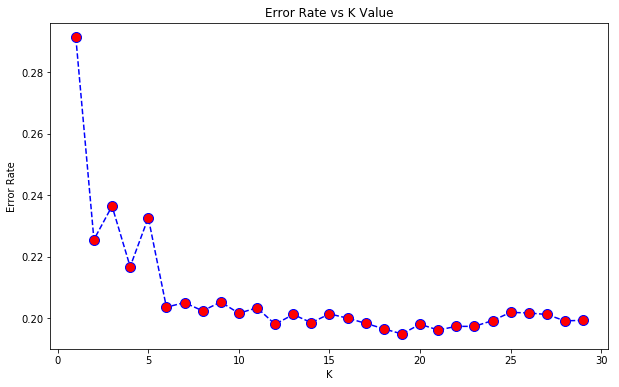

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate, color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
#Re-run choosing a K-value with a lower error based on graph above
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[7733  146]
 [1854  365]]


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7879
           1       0.71      0.16      0.27      2219

   micro avg       0.80      0.80      0.80     10098
   macro avg       0.76      0.57      0.58     10098
weighted avg       0.79      0.80      0.75     10098



In [15]:
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.8019409784115666


In [16]:
pred2=knn.predict(df_features)

In [17]:
df_features['Predictions']=pred2

In [18]:
df_features['Actuals']=df['Frisked']

In [19]:
df_features.head()

,Weapon,OfficerAge,OfficerMale,SubjectMale,OfficerBlack,OfficerWhite,OfficerHispanic,OfficerAsian,OfficerNative,OfficerMultiracial,...,SubjectBlack,SubjectWhite,SubjectHispanic,SubjectAsian,SubjectNative,SubjectMultiracial,SubjectPacIslander,SubjectUnknown,Predictions,Actuals
0,0,31,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,52,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,30,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,36,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,36,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df_features.to_csv('results.csv')